<a href="https://colab.research.google.com/github/abhishek1998s/Encryptix/blob/main/Customer_Churn_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhishekkumarsing98","key":"a543f01a3509efd831e62feeb53f6658"}'}

In [3]:
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 103MB/s]


In [5]:
!unzip bank-customer-churn-prediction

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

import warnings
warnings.simplefilter("ignore")  # Ignore warnings

In [9]:
# Load Data
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.isna().sum()  # Check for null values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
df.duplicated().sum()  # Check for duplicates

0

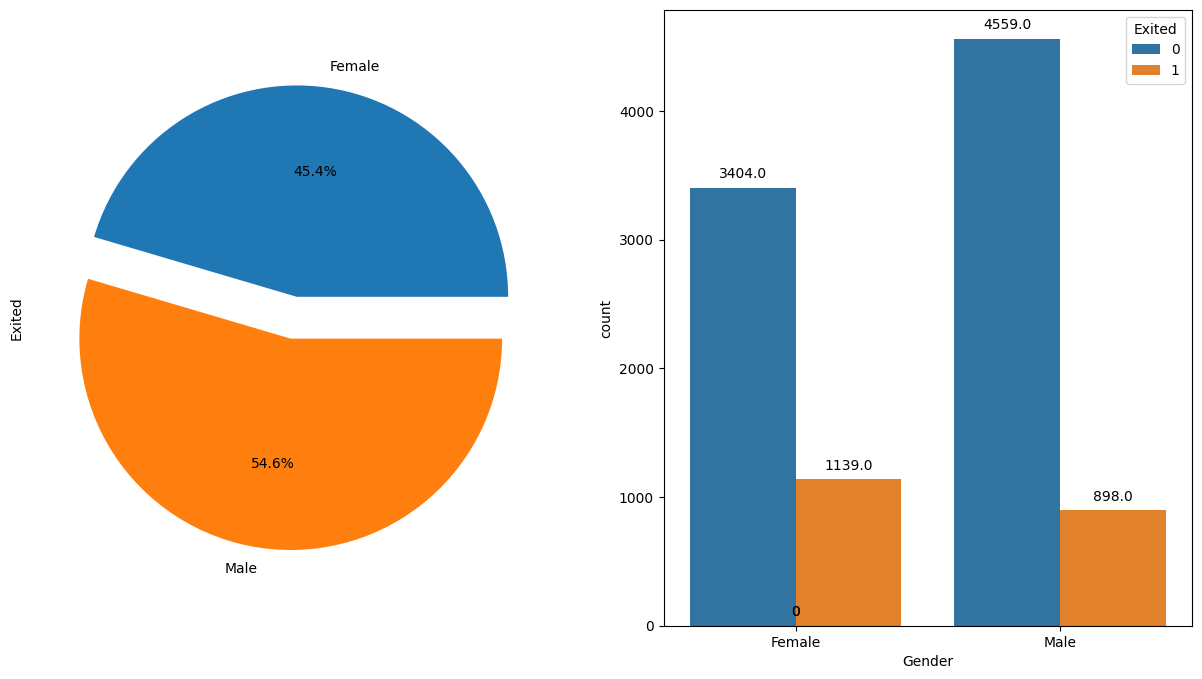

In [15]:
# Gender Distribution Visualization
fig, axb = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%", ax=axb[0])
ax = sns.countplot(x="Gender", hue="Exited", data=df, ax=axb[1])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

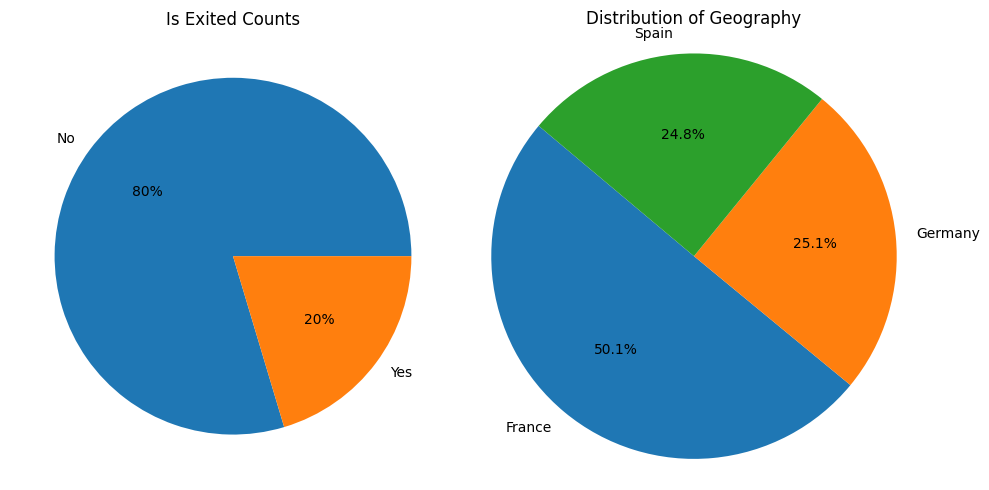

In [16]:
# Exited Counts Pie Chart
is_Exited = df["Exited"].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(is_Exited, labels=["No", "Yes"], autopct="%0.0f%%")
plt.title("Is Exited Counts")
plt.subplot(1, 2, 2)
geography_counts = df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Geography')
plt.tight_layout()
plt.show()

In [17]:
# Data Preprocessing
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [18]:
# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [19]:
# Under Sampling
No_class = df[df["Exited"] == 0]
yes_class = df[df["Exited"] == 1]
No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

In [20]:
X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [22]:
# Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Models Training and Evaluation
# Decision Tree
DT = DecisionTreeClassifier(max_depth=5, random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
ID3_accuracy = accuracy_score(predict_ID3, y_test)

In [24]:
# Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
LR_accuracy = accuracy_score(predict_LR, y_test)

In [25]:
# Random Forest
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_test)
RF_accuracy = accuracy_score(predict_RF, y_test)

In [26]:
# XGBoost
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)
predict_XGB = XGB.predict(X_test)
XGB_accuracy = accuracy_score(predict_XGB, y_test)

In [27]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)

In [28]:
# Linear SVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict_SVC = svm_model.predict(X_test)
svm_accuracy = accuracy_score(predict_SVC, y_test)

In [29]:
# Final Results
Algorithms = ['Gradient Boosting', 'Random Forest', 'XGB', 'ID3', 'Logistic Regression', 'SVC']
accuracy = [gb_accuracy, RF_accuracy, XGB_accuracy, ID3_accuracy, LR_accuracy, svm_accuracy]
FinalResult = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': accuracy})

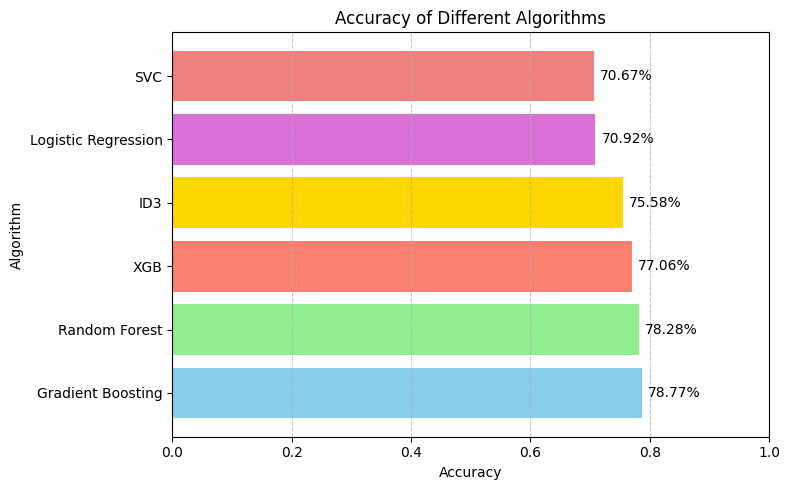

In [30]:
# Simplified Graph for Representation
plt.figure(figsize=(8, 5))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'lightcoral']
plt.barh(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)
for index, value in enumerate(FinalResult['Accuracy']):
    plt.text(value + 0.01, index, f'{value:.2%}', va='center', fontsize=10)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Accuracy of Different Algorithms')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()